In [1]:
import os
import datetime
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
OUTPUT_PATH = './output/capital_buffers'
if not os.path.exists(OUTPUT_PATH):
    os.mkdir(OUTPUT_PATH)

In [3]:
high_risk_prob = np.loadtxt("./thr_high_risk_prob.txt")

In [4]:
ct = pd.DataFrame([1 if i > 0.5 else 0 for i in high_risk_prob], columns=['high_risk'])
ct.head()

,high_risk
0,1
1,1
2,1
3,1
4,1


In [5]:
trading_date = pd.DataFrame(np.loadtxt('./intermediate/trading_date.txt', dtype='str'),columns=['trading_date'])
trading_date.head()

,trading_date
0,2008-01-02
1,2008-01-03
2,2008-01-04
3,2008-01-07
4,2008-01-08


In [6]:
data = trading_date.join(ct)
data.head()

,trading_date,high_risk
0,2008-01-02,1
1,2008-01-03,1
2,2008-01-04,1
3,2008-01-07,1
4,2008-01-08,1


In [7]:
data['year'] = data['trading_date'].apply(
    lambda x: str(datetime.datetime.strptime(x, "%Y-%m-%d").year))
data['quarter'] = data['trading_date'].apply(
    lambda x: 'Q' + str(int(np.ceil(datetime.datetime.strptime(x, "%Y-%m-%d").month / 3.))))
data.head()

,trading_date,high_risk,year,quarter
0,2008-01-02,1,2008,Q1
1,2008-01-03,1,2008,Q1
2,2008-01-04,1,2008,Q1
3,2008-01-07,1,2008,Q1
4,2008-01-08,1,2008,Q1


In [8]:
data['trading_quarter'] = data['year'] + data['quarter']
quarterly_data = data[['trading_quarter', 'high_risk']]
quarterly_data.head()

,trading_quarter,high_risk
0,2008Q1,1
1,2008Q1,1
2,2008Q1,1
3,2008Q1,1
4,2008Q1,1


In [9]:
import itertools
def ctn(x):
    num = [len(list(v)) for k, v in itertools.groupby(x.values) if k == 1]
    if len(num):
        return np.max(num)
    else:
        return 0

In [ ]:
quarterly_data.groupby('trading_quarter').apply(ctn)

In [38]:
result = quarterly_data.groupby('trading_quarter').mean()
result['high_risk'] = result['high_risk'].apply(lambda x: 1 if x > 0.4 else 0)
result.head()

In [25]:
result

,high_risk
trading_quarter,
2008Q1,1
2008Q2,1
2008Q3,1
2008Q4,1
2009Q1,1
2009Q2,1
2009Q3,1
2009Q4,0
2010Q1,0


In [39]:
result.sum()

high_risk    14
dtype: int64

In [22]:
17*111

1887

In [40]:
pd.DataFrame(np.tile(result, (111, 1))).to_csv(OUTPUT_PATH + '/high_risk_quarter0109_14.csv')

In [22]:
result.to_csv(OUTPUT_PATH + '/high_risk_quarter.csv')

In [12]:
choice = np.array(result.high_risk)
captial_buffer = np.where(choice == 1, 2.5, -2.5)
captial_buffer

array([ 2.5,  2.5,  2.5,  2.5,  2.5,  2.5,  2.5,  2.5,  2.5,  2.5, -2.5,
        2.5,  2.5,  2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5,  2.5,  2.5,
        2.5,  2.5,  2.5, -2.5,  2.5,  2.5,  2.5,  2.5,  2.5,  2.5,  2.5,
       -2.5, -2.5, -2.5, -2.5, -2.5, -2.5,  2.5])

In [13]:
np.sum(choice)*1.0/len(choice)

0.65

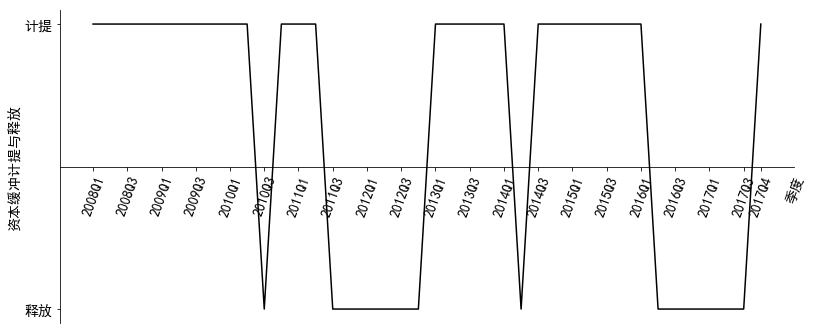

In [14]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
fig1, axes1 = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
fig1.tight_layout(pad=5, h_pad=5, w_pad=5)
# 设置坐标轴位置与显示
axes1.spines['bottom'].set_position(('data',0))
axes1.spines['right'].set_visible(False)
axes1.spines['top'].set_visible(False)

axes1.plot(captial_buffer, color='black')

xtick_list = range(0,len(result),2) + [len(result)-1]
xticklabel_list = list(result.iloc[xtick_list].index)
axes1.set_xticks(xtick_list)
axes1.set_xticklabels(xticklabel_list, fontsize=14, rotation=70)
axes1.set_yticks([-2.5, 2.5])
axes1.set_yticklabels([u'释放', u'计提'], fontsize=14)

axes1.set_ylabel(u'资本缓冲计提与释放', fontsize=14)
axes1.set_xlabel(u'季度', fontsize=14,rotation=70)
ticklab = axes1.xaxis.get_ticklabels()[0]
trans = ticklab.get_transform()
axes1.xaxis.set_label_coords(len(captial_buffer)+1, 0, transform=trans)
fig1.savefig(OUTPUT_PATH + u"/资本缓冲计提与释放.png")

In [ ]:
thr_median_std_eig_cen = np.loadtxt('./median_std_eig_cen.txt')
thr_median_weighted_eig_cen = np.loadtxt('./median_weighted_eig_cen.txt')

In [16]:
stk_info = np.loadtxt('./intermediate/stock_info/all_info.txt', dtype="str", encoding='utf-8')
# some information about industry
stk_info[stk_info == "银行"] = "金融"
industry_type = np.unique(stk_info[:, 3])
industry_num = len(industry_type)
industry_type_dict = {"信息": u'信息', "公用": u'公用', "医药": u'医药', "可选": u'可选',
                      "工业": u'工业', "材料": u'材料', "消费": u'消费', "电信": u'电信',
                      "能源": u'能源', "金融": u'金融'}
pos_dict = {}
pos_list = []
for i in range(0, industry_num):
    pos_dict[industry_type[i]] = list(np.where(stk_info == industry_type[i])[0])
    pos_list += pos_dict[industry_type[i]]

In [17]:
financial_pos = pos_dict['金融']
financial_eig_cen = thr_median_std_eig_cen[:, financial_pos]
financial_eig_cen

array([[1.52481752e-01, 1.08889587e-03, 3.31315480e-18, 2.25228933e-03,
        2.89996284e-03, 2.53706380e-03, 1.53945695e-01, 9.03501234e-04,
        2.77758609e-01, 3.44526473e-01, 1.71770825e-01, 3.32368526e-03,
        1.77873958e-01, 2.17672988e-03, 1.83983062e-03, 5.60076645e-04,
        4.48185730e-04, 1.15709905e-03, 1.21852058e-03, 5.37839305e-03,
        1.91987511e-04, 1.75166531e-01, 2.18629665e-03, 2.87169298e-01,
        2.54078335e-01, 4.87407248e-03, 1.80727669e-01, 1.02668801e-02,
        1.48042405e-03, 2.39755885e-03, 3.50696724e-02, 6.68073896e-03,
        1.96335716e-01],
       [2.32646737e-01, 1.74542828e-03, 4.06027407e-19, 8.21167022e-04,
        8.14979558e-04, 9.47036602e-04, 1.65826768e-01, 7.56300811e-03,
        2.20221574e-01, 3.63563457e-01, 2.28677051e-01, 9.11790377e-04,
        3.78246463e-01, 1.73103425e-03, 6.48331544e-04, 1.16879091e-03,
        1.02712454e-03, 1.40499329e-03, 7.06319296e-04, 9.14180996e-04,
        3.51351954e-04, 8.93502583e-02,

In [18]:
weight = (financial_eig_cen - financial_eig_cen.min(axis=1).reshape(2, 1)) * 1.0 / \
(financial_eig_cen.max(axis=1).reshape(2, 1) - financial_eig_cen.min(axis=1).reshape(2, 1))

In [19]:
capital = np.dot(np.array([2.5 * choice, -2.5 * (1 - choice)]).T, weight).T

In [20]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
fig2, axes2 = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
fig2.tight_layout(pad=5, h_pad=5, w_pad=5)
for i in range(0, len(financial_pos)):
    axes2.plot(capital[i])
# 设置坐标轴位置与显示
axes2.spines['bottom'].set_position(('data',0))
axes2.spines['right'].set_visible(False)
axes2.spines['top'].set_visible(False)

xtick_list = range(0,len(result),2) + [len(result)-1]
xticklabel_list = list(result.iloc[xtick_list].index)
axes2.set_xticks(xtick_list)
axes2.set_xticklabels(xticklabel_list, fontsize=14, rotation=70)
axes2.set_ylim([-3, 3])

axes2.set_ylabel(u'资本缓冲计提与释放', fontsize=14)
axes2.set_xlabel(u'季度', fontsize=14,rotation=70)
ticklab = axes2.xaxis.get_ticklabels()[0]
trans = ticklab.get_transform()
axes2.xaxis.set_label_coords(len(captial_buffer)+1, 0, transform=trans)
fig2.savefig(OUTPUT_PATH + u"/资本缓冲.png")